Web Scraping:
Utilize Python libraries such as BeautifulSoup to scrape product information from the online retailer's website.

Collect data attributes including product names, categories, prices, availability status, and promotional details.
Data Cleaning:
 
Address missing or inconsistent data entries, such as absent prices or ambiguous product descriptions.
Standardize text fields to ensure uniformity in product names and categories.
 
Data Transformation:
 
Convert price data into numerical formats for analysis.
Categorize products into hierarchical groups (e.g., Electronics > Mobile Phones > Smartphones).
 
Data Analysis:
 
Conduct exploratory data analysis (EDA) to uncover insights:
Identify average pricing within each product category.
Detect seasonal or promotional pricing patterns.
Assess product availability trends over time.
 
Data Visualization:
 
Employ visualization library Plotly to create some charts.

In [81]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#Utilize Python libraries such as BeautifulSoup to scrape product information from the online retailer's website.
url = "https://www.jumia.com.ng/catalog/?q=phones"
response = requests.get(url)
if response.status_code == 200:
    print("Successfully fetched the webpage!")
else:
    print("Failed to fetch the webpage.")

Successfully fetched the webpage!


In [7]:
soup = BeautifulSoup(response.text, 'html.parser')

In [9]:
soup

<!DOCTYPE html>
<html dir="ltr" lang="en"><head><meta charset="utf-8"/><title>Shop All Products - TVs, Laptops, Fashion Items | Jumia Nigeria</title><meta content="product" property="og:type"/><meta content="Jumia Nigeria" property="og:site_name"/><meta content="Shop All Products - TVs, Laptops, Fashion Items | Jumia Nigeria" property="og:title"/><meta content="Enjoy amazing discounts and deals up to 70% on your favourite iPhones, android devices, TVs, Cookers and more offers at the best prices on Jumia Nigeria." property="og:description"/><meta content="/catalog/" property="og:url"/><meta content="https://ng.jumia.is/cms/jumialogonew.png" property="og:image"/><meta content="en_NG" property="og:locale"/><meta content="Shop All Products - TVs, Laptops, Fashion Items | Jumia Nigeria" name="title"/><meta content="noindex,follow" name="robots"/><meta content="Enjoy amazing discounts and deals up to 70% on your favourite iPhones, android devices, TVs, Cookers and more offers at the best pri

In [11]:
#Collect data attributes including product names, categories, prices, availability status, and promotional details.
items = []

products = soup.find_all('article', class_ = "prd _fb col c-prd")
for product in products:
    name = product.find('h3', class_ = "name")
    product_name = name.text.strip() if name else "N/A"
    
    price = product.find('div', class_ = "prc")
    product_price = price.text.strip() if price else "N/A"

    availability = "in stock"

    promo = product.find('div', class_ = "bdg _dsct")
    promo_details = promo.text.strip() if promo else "N/A"

    items.append({
        'name': product_name,
        'price': product_price,
        'availability': availability,
        'promo': promo_details})
    

In [13]:
items

[{'name': 'Samsung Galaxy A05 6.7" 4GB RAM/64GB ROM Android 13 - Light Green',
  'price': '₦ 118,435',
  'availability': 'in stock',
  'promo': 'N/A'},
 {'name': 'itel S23+ 6.78" FHD 8GB RAM/256GB ROM Android 12 - Cyan',
  'price': '₦ 198,000',
  'availability': 'in stock',
  'promo': 'N/A'},
 {'name': 'itel A50 6.6" 2GB RAM/64GB ROM Android 12 - Black',
  'price': '₦ 102,000',
  'availability': 'in stock',
  'promo': 'N/A'},
 {'name': 'itel RS4 256GB ROM+24(12+12) GB RAM Lurex Black',
  'price': '₦ 199,000',
  'availability': 'in stock',
  'promo': 'N/A'},
 {'name': 'XIAOMI Redmi 13 6.79" 8GB RAM/256GB ROM Android 13  -Black',
  'price': '₦ 238,075',
  'availability': 'in stock',
  'promo': 'N/A'},
 {'name': "XIAOMI Redmi 14C 6.88'' 8GBRAM/256GB ROM 5G Android 14 -Midnight Black",
  'price': '₦ 400,000',
  'availability': 'in stock',
  'promo': 'N/A'},
 {'name': "XIAOMI Redmi 14C 6.88'' 8GB RAM/256GB ROM Android 12-Starry Blue",
  'price': '₦ 176,320',
  'availability': 'in stock',
  

In [69]:
df_items = pd.DataFrame(items)

# Display the DataFrame
df_items

,name,price,availability,promo
0,"Samsung Galaxy A05 6.7"" 4GB RAM/64GB ROM Andro...","₦ 118,435",in stock,N/A
1,"itel S23+ 6.78"" FHD 8GB RAM/256GB ROM Android ...","₦ 198,000",in stock,N/A
2,"itel A50 6.6"" 2GB RAM/64GB ROM Android 12 - Black","₦ 102,000",in stock,N/A
3,itel RS4 256GB ROM+24(12+12) GB RAM Lurex Black,"₦ 199,000",in stock,N/A
4,"XIAOMI Redmi 13 6.79"" 8GB RAM/256GB ROM Androi...","₦ 238,075",in stock,N/A
5,XIAOMI Redmi 14C 6.88'' 8GBRAM/256GB ROM 5G An...,"₦ 400,000",in stock,N/A
6,XIAOMI Redmi 14C 6.88'' 8GB RAM/256GB ROM Andr...,"₦ 176,320",in stock,N/A
7,"XIAOMI Redmi A3 Pro 6.88"" 4GB RAM / 128GB ROM ...","₦ 700,000",in stock,N/A
8,"XIAOMI Redmi A3 Pro 6.88"" 4GB RAM / 128GB ROM ...","₦ 133,095",in stock,N/A
9,XIAOMI Redmi 14C 6.88'' 8GB RAM/256GB ROM Andr...,"₦ 450,000",in stock,N/A


In [39]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          40 non-null     object
 1   price         40 non-null     Int64 
 2   availability  40 non-null     object
 3   promo         40 non-null     object
dtypes: Int64(1), object(3)
memory usage: 1.4+ KB


In [35]:
#Convert price data into numerical formats for analysis (Remove naira sign from specified columns so we can convert to numeric later).
specified_columns = ['price']
for col in specified_columns:
    df_items[col] = df_items[col].astype(str).str.replace('₦ ', '').str.replace(',','').str.strip()

In [37]:
numeric_columns = ['price']
df_items[numeric_columns] = df_items[numeric_columns].astype(pd.Int64Dtype())

In [73]:
#Categorize products into hierarchical groups (e.g., Electronics > Mobile Phones > Smartphones).
import re
def extract_model(name):
    match = re.search(r'Samsung Galaxy ([A-Za-z0-9 ]+)',name)
    if match:
        return 'high grade' 
    match = re.search(r'itel ([A-Za-z0-9 ]+)',name)
    if match: 
        return 'high grade'
    match = re.search(r'XIAOMI Redmi ([A-Za-z0-9 ]+)',name)
    if match: 
        return 'high grade'
    match = re.search(r'Nokia ([A-Za-z0-9 ]+)',name)
    if match: 
        return 'medium grade'
    match = re.search(r'Tecno ([A-Za-z0-9 ]+)',name)
    if match: 
        return 'medium grade'
    match = re.search(r'Infinix ([A-Za-z0-9 ]+)',name)
    if match: 
        return 'low grade'
    match = re.search(r'AGM Note ([A-Za-z0-9 ]+)',name)
    if match: 
        return 'low grade'
    return 'unknown'

In [77]:
df_items['Model_Category'] = df_items['name'].apply(extract_model)
df_items

,name,price,availability,promo,Model_Category
0,"Samsung Galaxy A05 6.7"" 4GB RAM/64GB ROM Andro...","₦ 118,435",in stock,N/A,high grade
1,"itel S23+ 6.78"" FHD 8GB RAM/256GB ROM Android ...","₦ 198,000",in stock,N/A,high grade
2,"itel A50 6.6"" 2GB RAM/64GB ROM Android 12 - Black","₦ 102,000",in stock,N/A,high grade
3,itel RS4 256GB ROM+24(12+12) GB RAM Lurex Black,"₦ 199,000",in stock,N/A,high grade
4,"XIAOMI Redmi 13 6.79"" 8GB RAM/256GB ROM Androi...","₦ 238,075",in stock,N/A,high grade
5,XIAOMI Redmi 14C 6.88'' 8GBRAM/256GB ROM 5G An...,"₦ 400,000",in stock,N/A,high grade
6,XIAOMI Redmi 14C 6.88'' 8GB RAM/256GB ROM Andr...,"₦ 176,320",in stock,N/A,high grade
7,"XIAOMI Redmi A3 Pro 6.88"" 4GB RAM / 128GB ROM ...","₦ 700,000",in stock,N/A,high grade
8,"XIAOMI Redmi A3 Pro 6.88"" 4GB RAM / 128GB ROM ...","₦ 133,095",in stock,N/A,high grade
9,XIAOMI Redmi 14C 6.88'' 8GB RAM/256GB ROM Andr...,"₦ 450,000",in stock,N/A,high grade


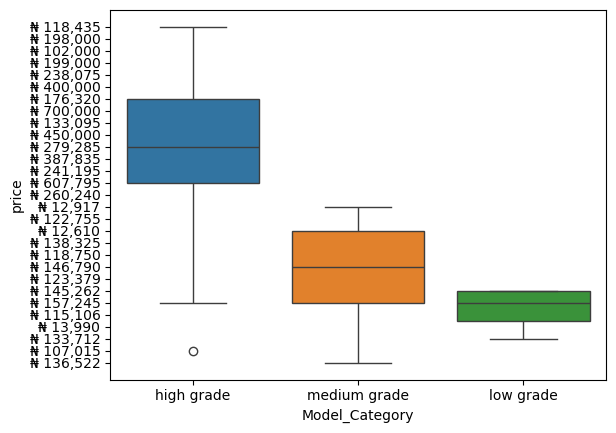

In [85]:
#Conduct exploratory data analysis (EDA) to uncover insights:
#Identify average pricing within each product category.
sns.boxplot(x="Model_Category", y="price", data=df_items, hue = 'Model_Category') #hue adds colours 
plt.show()